<a href="https://colab.research.google.com/github/manikesh12/team5-miniproject1/blob/main/Store_Item_Demand_Forecasting1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"likhitha19daram","key":"f99b4798d1eb26c763508fa763155a48"}'}

In [2]:
# pip install -q kaggle
!mkdir ~/.kaggle

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
print(os.listdir())

['.config', 'kaggle.json', 'sample_data']


In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# !kaggle datasets list
!kaggle competitions download -c demand-forecasting-kernels-only

  0% 0.00/3.29M [00:00<?, ?B/s]
100% 3.29M/3.29M [00:00<00:00, 211MB/s]


In [8]:
!unzip demand-forecasting-kernels-only.zip

Archive:  demand-forecasting-kernels-only.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [9]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

# Set seeds to make the experiment more reproducible
from tensorflow.random import set_seed
from numpy.random import seed
set_seed(1)
seed(1)


In [ ]:
print(f"The dataset has {train_df.shape[0]} rows and {train_df.shape[1]} columns.")

The dataset has 913000 rows and 4 columns.


In [ ]:
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [ ]:
test_df.head()

,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [ ]:
train_df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [ ]:
test_df.describe()

,id,store,item
count,45000.000000,45000.000000,45000.00000
mean,22499.500000,5.500000,25.50000
std,12990.525394,2.872313,14.43103
min,0.000000,1.000000,1.00000
25%,11249.750000,3.000000,13.00000
50%,22499.500000,5.500000,25.50000
75%,33749.250000,8.000000,38.00000
max,44999.000000,10.000000,50.00000


In [10]:
#Range of the time data
First_date=print(f"The first date is {train_df['date'].min()}")
Last_date=print(f"The last date is {train_df['date'].max()}")

The first date is 2013-01-01
The last date is 2017-12-31


In [ ]:
#Range of the forecasting time data
print(f"The first date is {test_df['date'].min()}")
print(f"The last date is {test_df['date'].max()}")

The first date is 2018-01-01
The last date is 2018-03-31


In [ ]:
#Check the unique counts of stores and items
print(f"the unique counts of stores are {len(pd.unique(train_df['store']))}")
print(f"the unique counts of items are {len(pd.unique(train_df['item']))}")

the unique counts of stores are 10
the unique counts of items are 50


In [ ]:
train_df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [ ]:
# Checking null values
print(train_df.isna().sum())
print(test_df.isna().sum())

date     0
store    0
item     0
sales    0
dtype: int64
id       0
date     0
store    0
item     0
dtype: int64
id       0
sales    0
dtype: int64


In [ ]:
# Checking duplicates
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0
0


In [ ]:
print(f"The number of duplicated rows are {len(train_df)-len(train_df.drop_duplicates())}")

The number of duplicated rows are 0


In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
print(train_df['date'].dtype)

datetime64[ns]


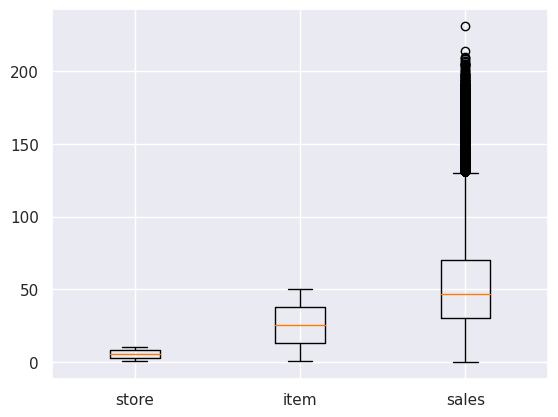

In [ ]:
# outliers
df = train_df.drop('date' , axis=1)
plt.boxplot(df)
plt.xticks(ticks = [1,2,3], labels= list(df.columns))

plt.show()

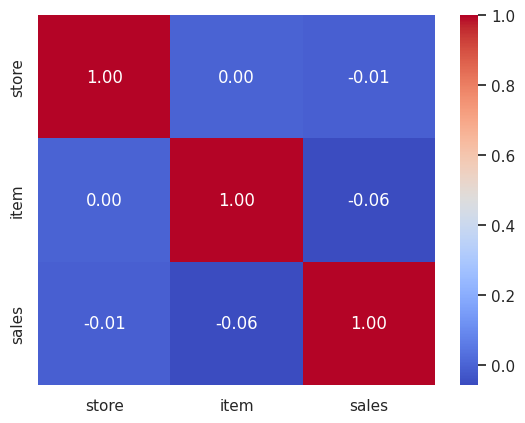

In [ ]:
# correlation
corr_matrix = train_df.drop('date',axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

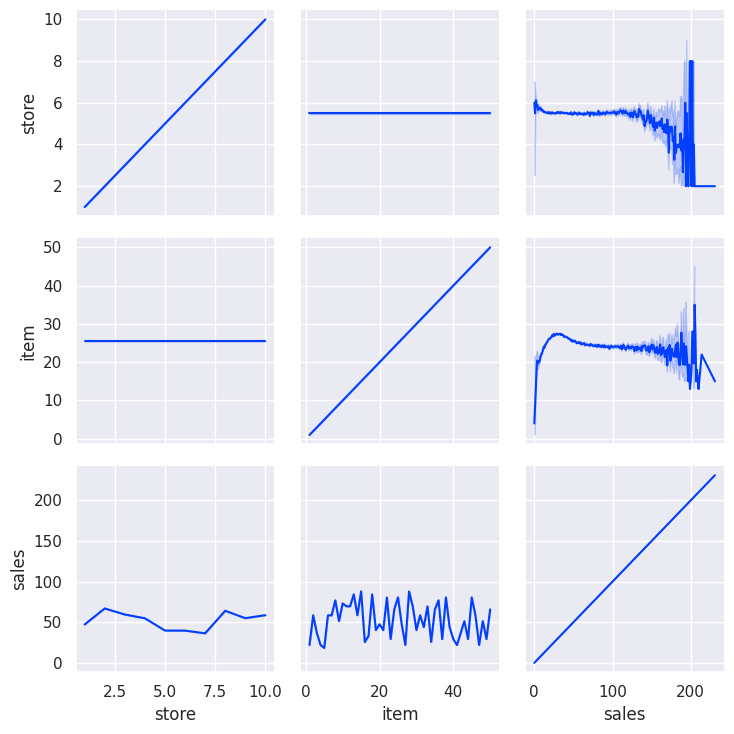

In [ ]:
g = sns.PairGrid(train_df)
g.map(sns.lineplot)
plt.tight_layout()
plt.show()

In [11]:
def split_date(df):
    # split date
    df['date'] = pd.to_datetime(df.date, format="%Y-%m-%d")

    # adding columns for date identifiers
    df['day'] = df.date.dt.day.astype(int)
    df['month'] = df.date.dt.month.astype(int)
    df['year'] = df.date.dt.year.astype(int)
    df['day_of_week'] = df.date.dt.dayofweek.astype(int)  # Mon:0, Sun: 6
    df['week_of_month'] = (df['date'].dt.isocalendar().week.astype(int) - 1) % 4 # 0 to 4
    df['week_of_year'] = df['date'].dt.isocalendar().week.astype(int) # 0 to 52
    df['quarter'] = df['date'].dt.quarter.astype(int) # 1 to 4

    return df

train = split_date(train_df)
test = split_date(test_df)

In [ ]:
train.head()

,date,store,item,sales,day,month,year,day_of_week,week_of_month,week_of_year,quarter
0,2013-01-01,1,1,13,1,1,2013,1,0,1,1
1,2013-01-02,1,1,11,2,1,2013,2,0,1,1
2,2013-01-03,1,1,14,3,1,2013,3,0,1,1
3,2013-01-04,1,1,13,4,1,2013,4,0,1,1
4,2013-01-05,1,1,10,5,1,2013,5,0,1,1


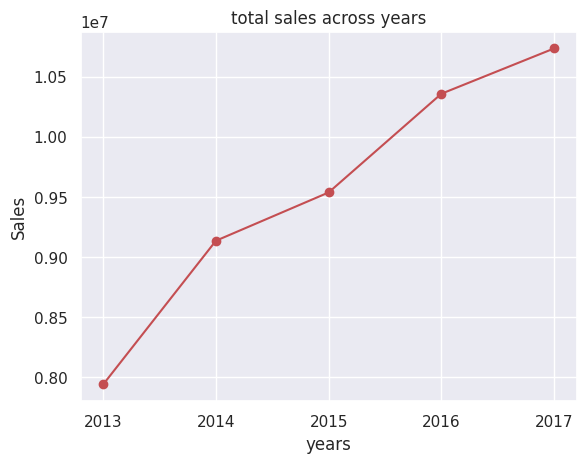

In [ ]:
# yearly sales of all items
year_sales = train.groupby('year')['sales'].sum()

plt.plot(train.year.unique(), year_sales, marker='o', color='r')
plt.xticks(train.year.unique())

plt.title("total sales across years")
plt.xlabel("years")
plt.ylabel("Sales")
plt.show()

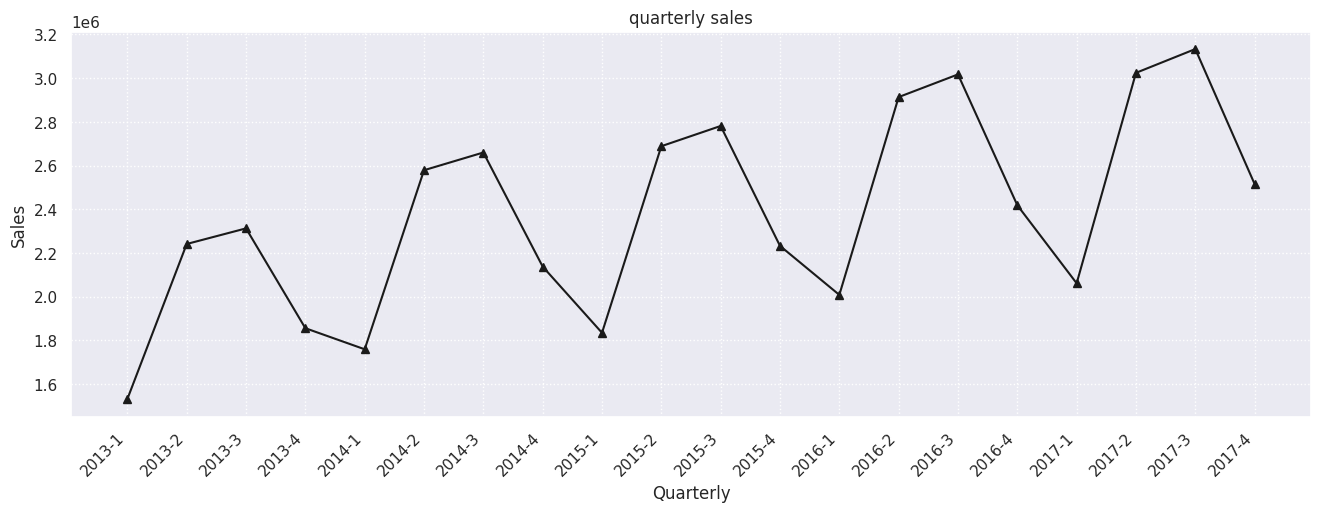

In [ ]:
# quarter sales
plt.figure(figsize=(16,5))

df_ts = train.groupby([train.year,train.quarter])['sales'].sum()
df_ts.plot(marker='^',c= 'k')
plt.xlabel('Quarterly')
plt.ylabel('Sales')

xticks_labels = [f"{yr}-{qr}" for yr,qr in zip(df_ts.index.get_level_values(0), df_ts.index.get_level_values(1))]
plt.xticks(range(len(df_ts)), xticks_labels, rotation=45, ha='right')

plt.title("quarterly sales")
plt.grid(linestyle=':')
plt.show()

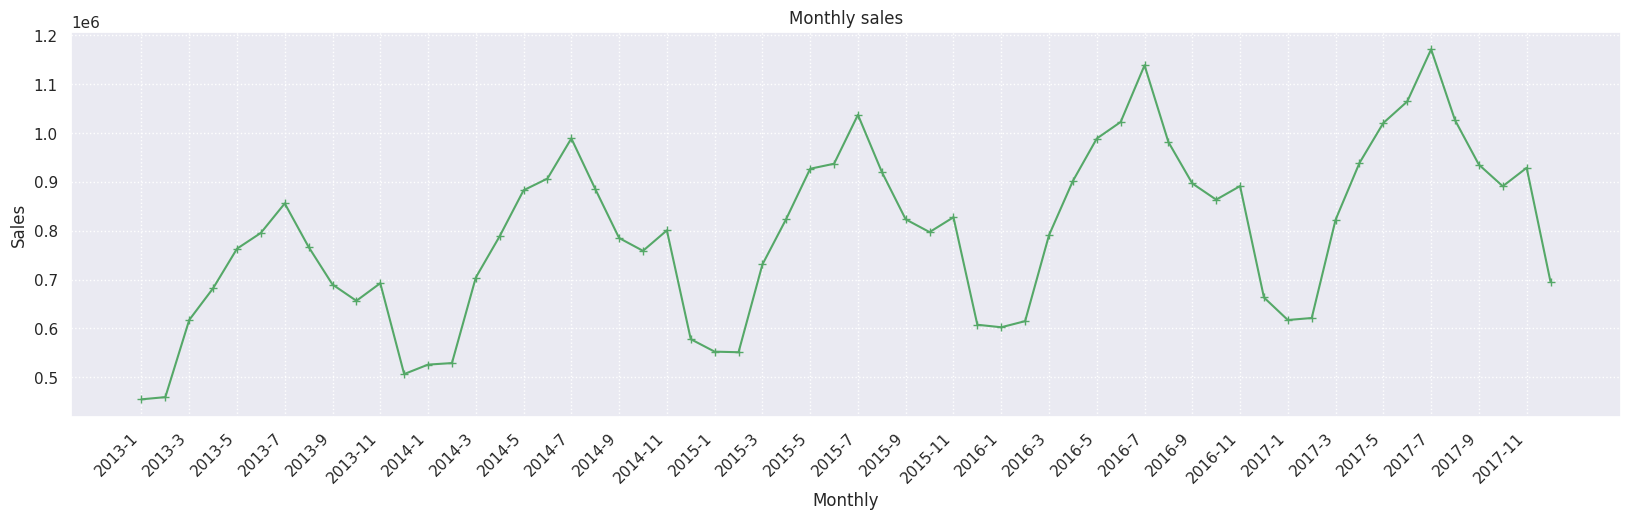

In [ ]:
# monthly sales
plt.figure(figsize=(20,5))

df_ms = train.groupby([train.year,train.month])['sales'].sum()
df_ms.plot(marker='+',c= 'g')
plt.xlabel('Monthly')
plt.ylabel('Sales')

xticks_labels = [f"{yr}-{mt}" for yr,mt in zip(df_ms.index.get_level_values(0), df_ms.index.get_level_values(1))]
xticks_labels1 = []
for i in range(0,len(df_ms),2):
  xticks_labels1.append(xticks_labels[i])

plt.xticks(range(0,len(df_ms),2), xticks_labels1, rotation=45, ha='right')

plt.title("Monthly sales")
plt.grid(ls = ':')
plt.show()

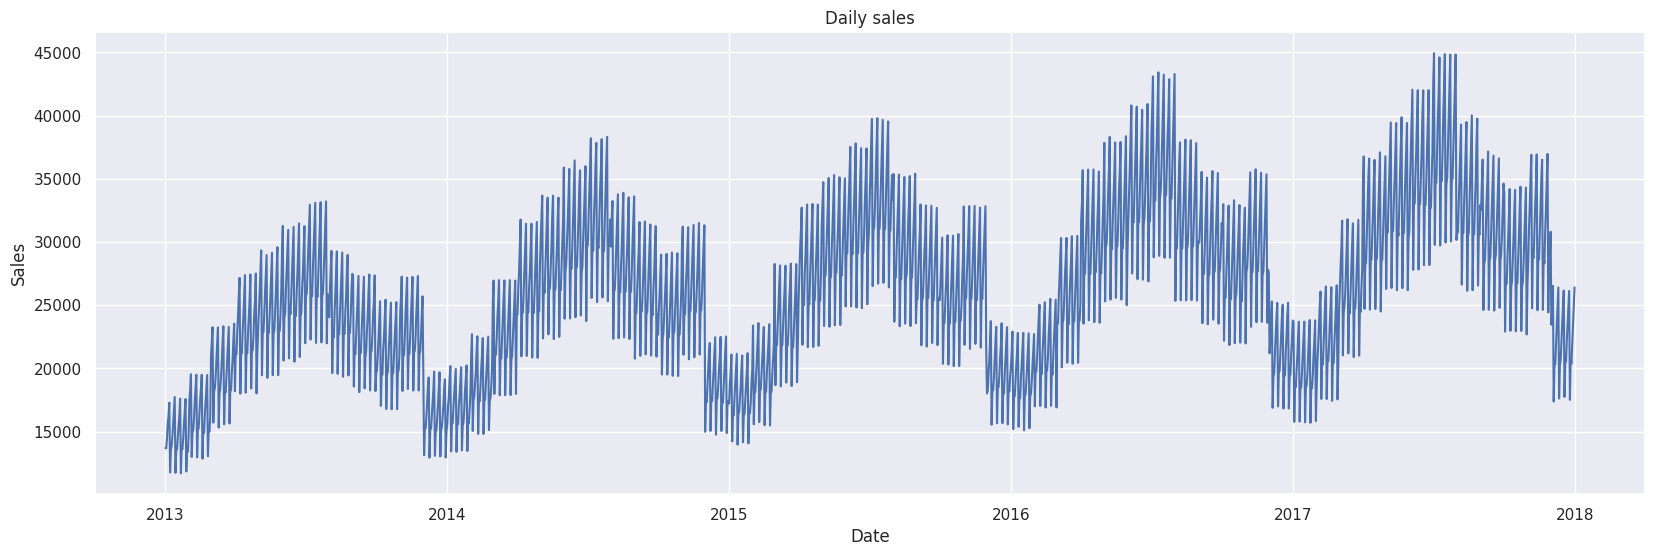

In [ ]:
#Daily sales for all product over time
daily_sales= train.groupby('date', as_index=False)['sales'].sum()
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")

# Plot the daily sales
plt.plot(daily_sales['date'], daily_sales['sales'])

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily sales')

# Show the plot
plt.show()

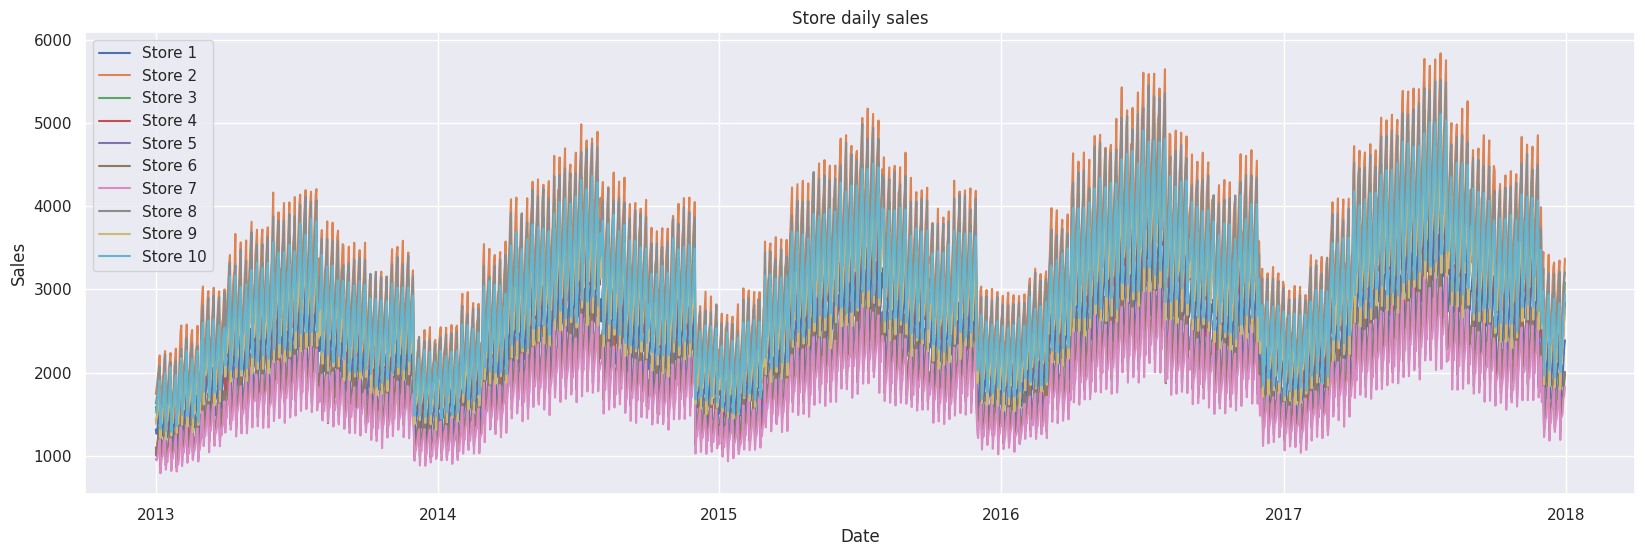

In [ ]:
#Daily sales by stores
store_daily_sales= train.groupby(['store','date'],as_index=False)['sales'].sum()
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")

# Loop through unique stores
for store in store_daily_sales['store'].unique():
    current_store_daily_sales = store_daily_sales[store_daily_sales['store'] == store]
    plt.plot(current_store_daily_sales['date'], current_store_daily_sales['sales'], label=f'Store {store}')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Store daily sales')
plt.legend()
plt.show()

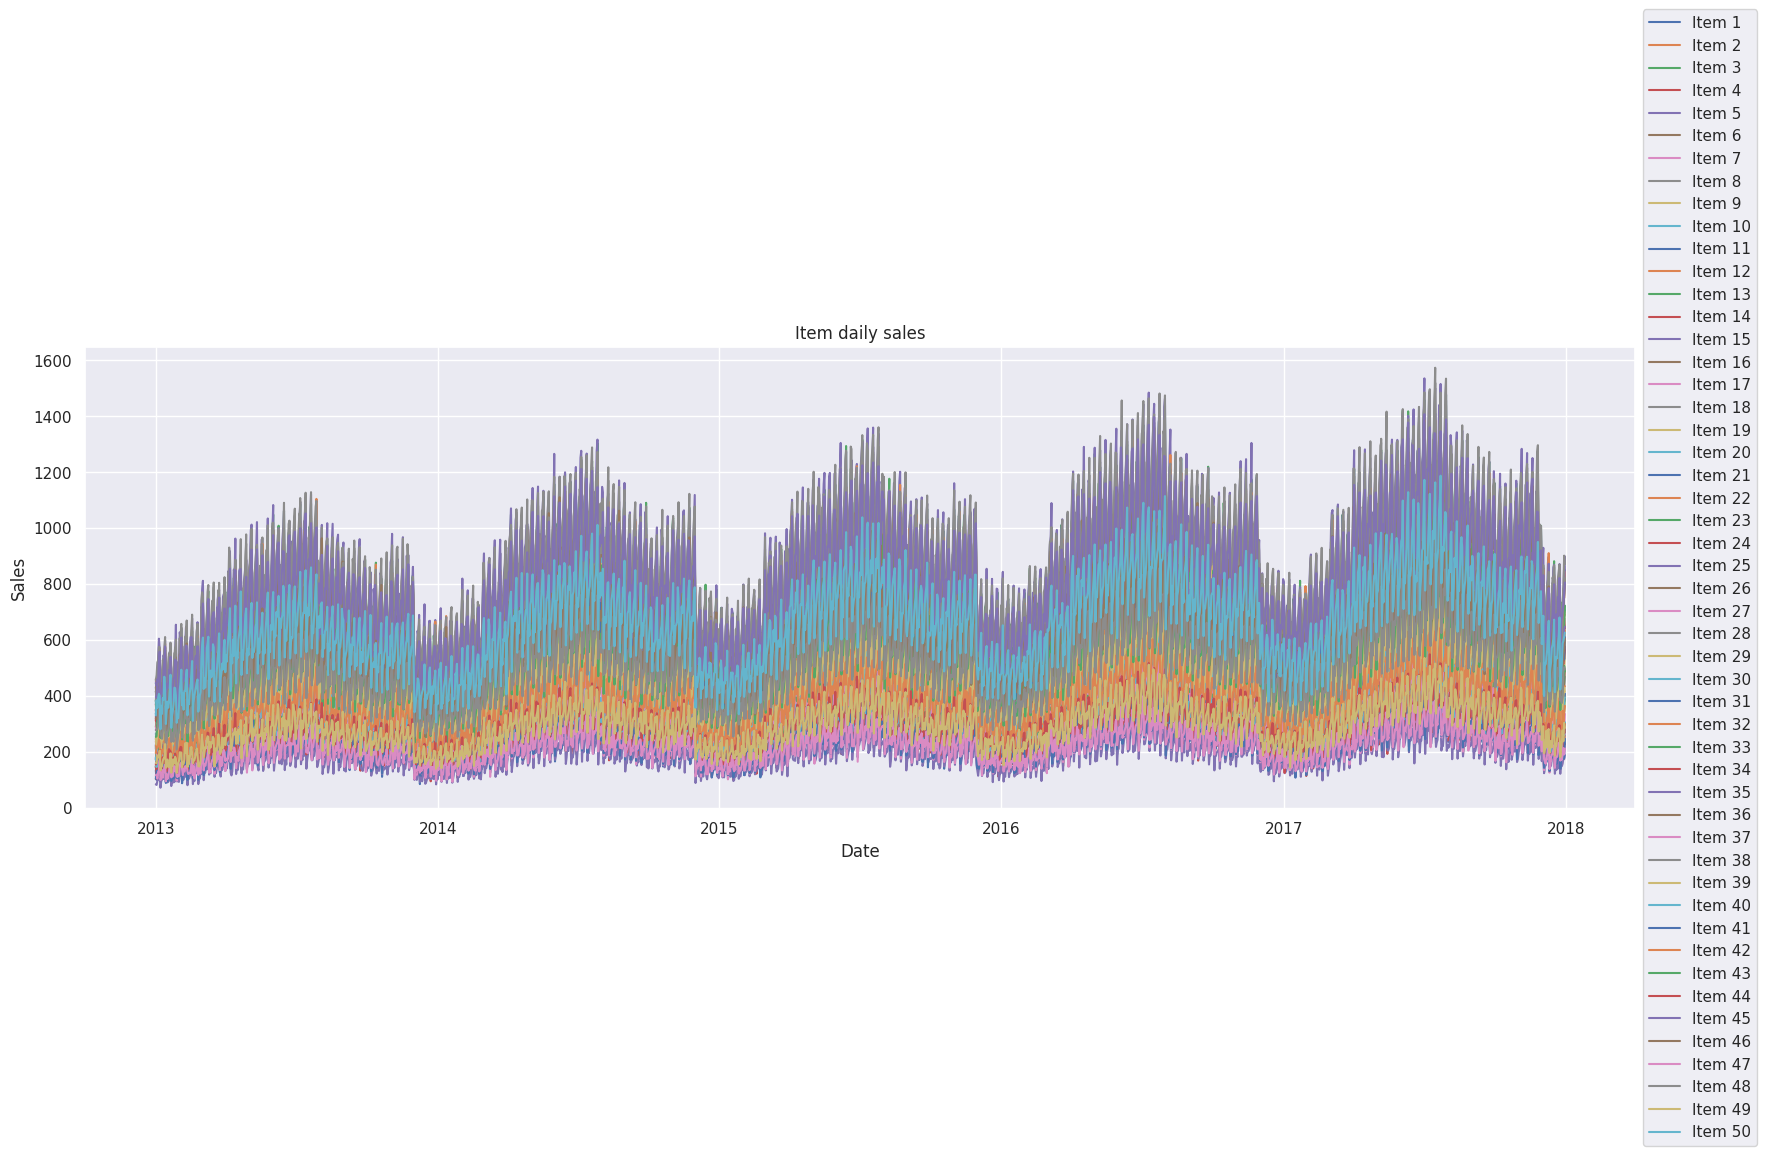

In [ ]:
#daily sales by items
item_daily_sales = train.groupby(['item', 'date'], as_index=False)['sales'].sum()
plt.figure(figsize=(20, 6))
sns.set(style="darkgrid")
# Loop through unique items
for item in item_daily_sales['item'].unique():
    current_item_daily_sales = item_daily_sales[item_daily_sales['item'] == item]
    plt.plot(current_item_daily_sales['date'], current_item_daily_sales['sales'], label=f'Item {item}')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Item daily sales')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()

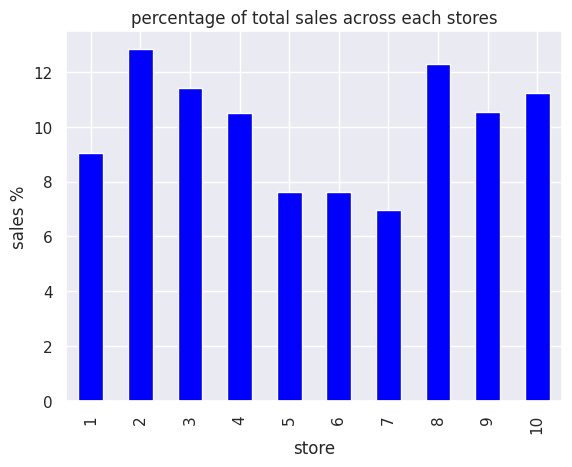

In [ ]:
# percentage of total sales across each stores
store_sales = train.groupby('store')['sales'].sum()
sales_percentages = (store_sales / store_sales.sum()) * 100

sales_percentages.plot(kind='bar', color='blue')
plt.ylabel('sales %')
plt.title("percentage of total sales across each stores")
plt.show()

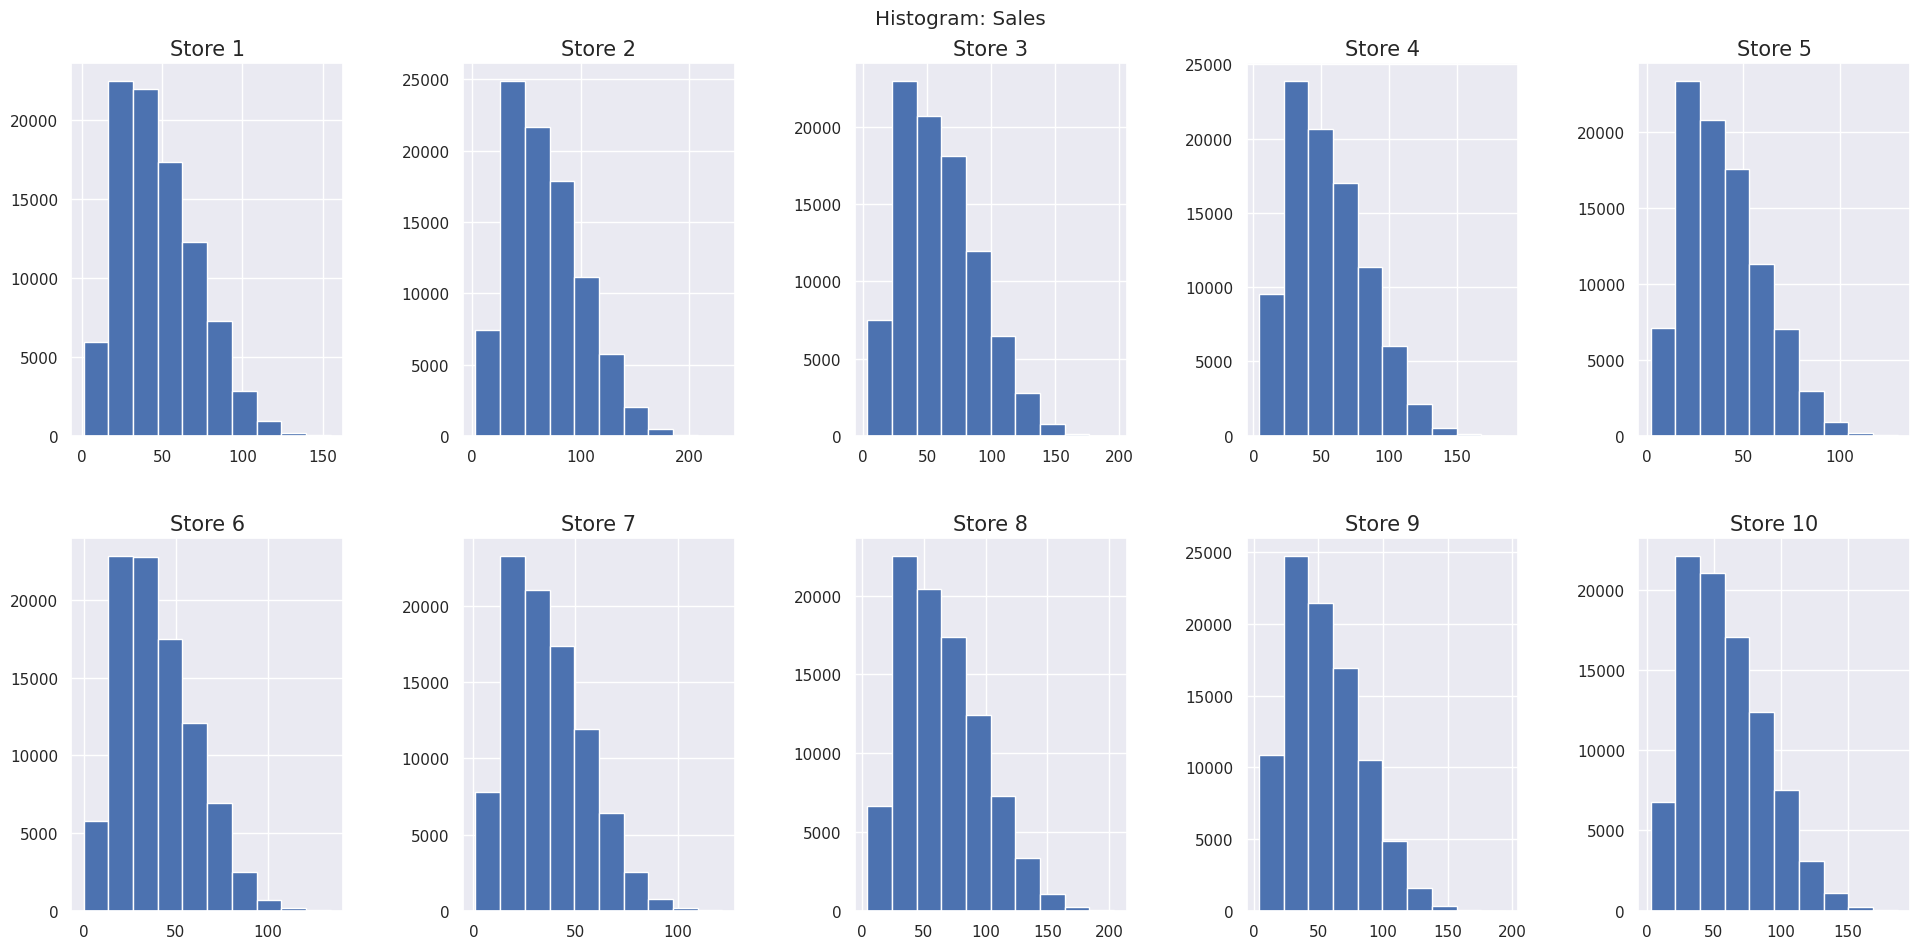

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i in range(1,11):
    if i < 6:
        train[train.store == i].sales.hist(ax=axes[0, i-1])
        axes[0,i-1].set_title("Store " + str(i), fontsize = 15)
    else:
        train[train.store == i].sales.hist(ax=axes[1, i - 6])
        axes[1,i-6].set_title("Store " + str(i), fontsize = 15)

plt.tight_layout(pad=3)
plt.suptitle("Histogram: Sales");

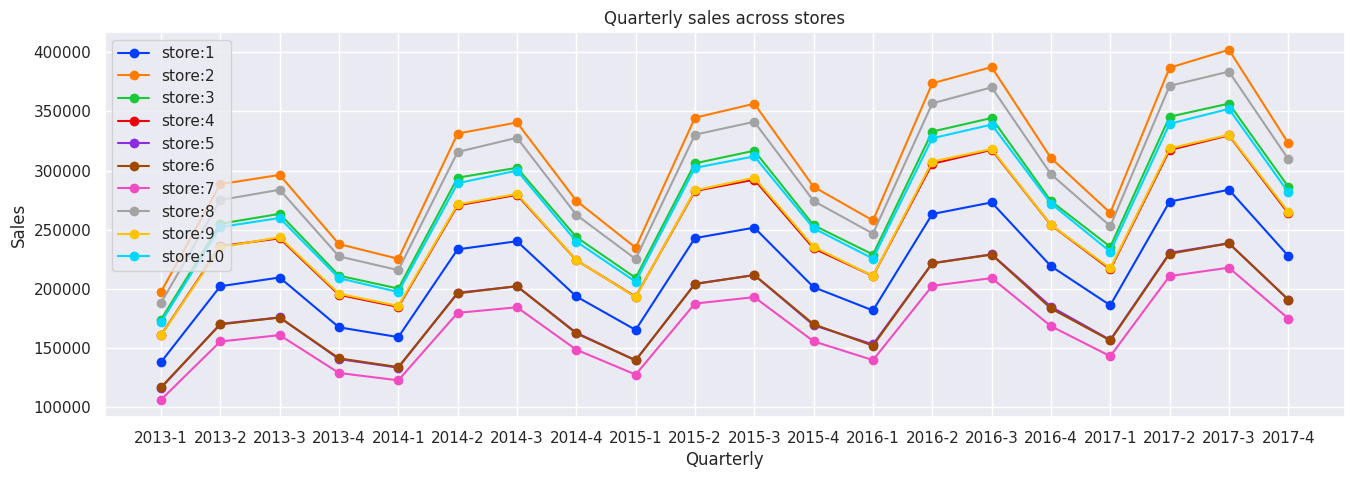

In [ ]:
# quarter sales at each store
plt.figure(figsize=(16,5))
sns.set_palette("bright")

df_qs = train.groupby([train.year,train.quarter,train['store']]).agg({'sales':'sum'})

for st in df_qs.index.get_level_values(2).unique():
  df = df_qs[df_qs.index.get_level_values(2)==st]
  time = [f'{yr}-{qr}' for yr,qr in zip(df.index.get_level_values(0), df.index.get_level_values(1))]
  sale = np.array(df.sales)
  plt.plot(time,sale, marker='o', label=f'store:{st}',)

plt.title("Quarterly sales across stores")
plt.xlabel('Quarterly')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.show()

In [12]:
# drop the date column,
train = train.drop("date", axis=1)
# drop the date column,
test = test.drop("date", axis=1)

Text(0.5, 1.0, 'average sales per month across the year')

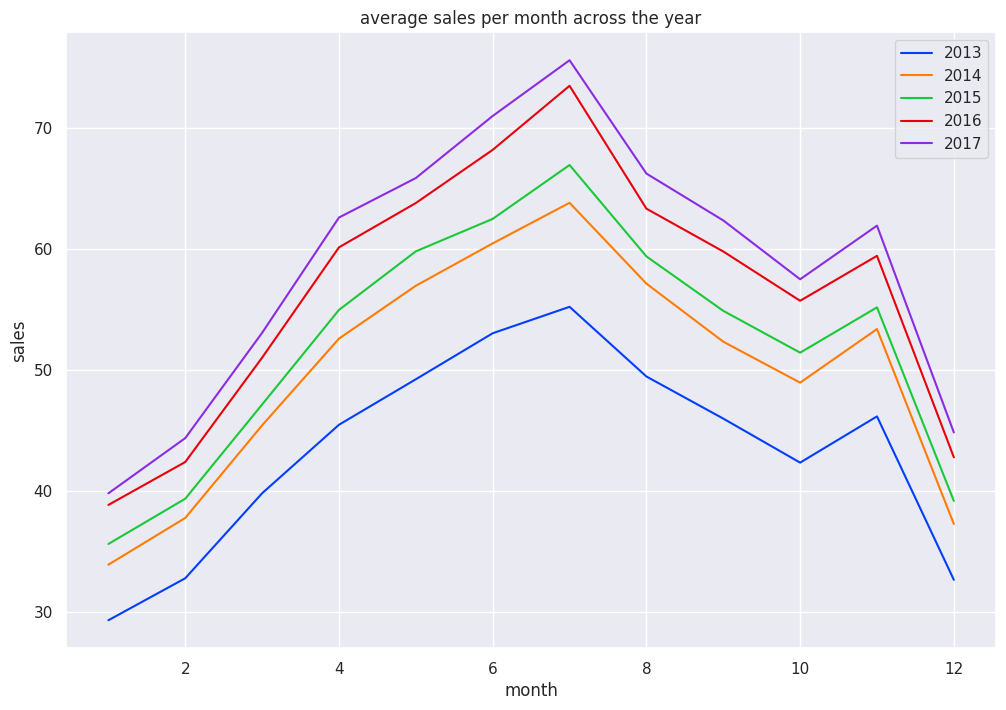

In [ ]:
#average sales per month across the year
plt.figure(figsize = (12, 8))
for year in range(2013 , 2018):
   monthly_sales = train.loc[train.year == year].groupby('month').sales.mean()
   sns.lineplot(x = range(1 , 13), y = monthly_sales, label = year)
   plt.xlabel('month')

plt.title("average sales per month across the year")

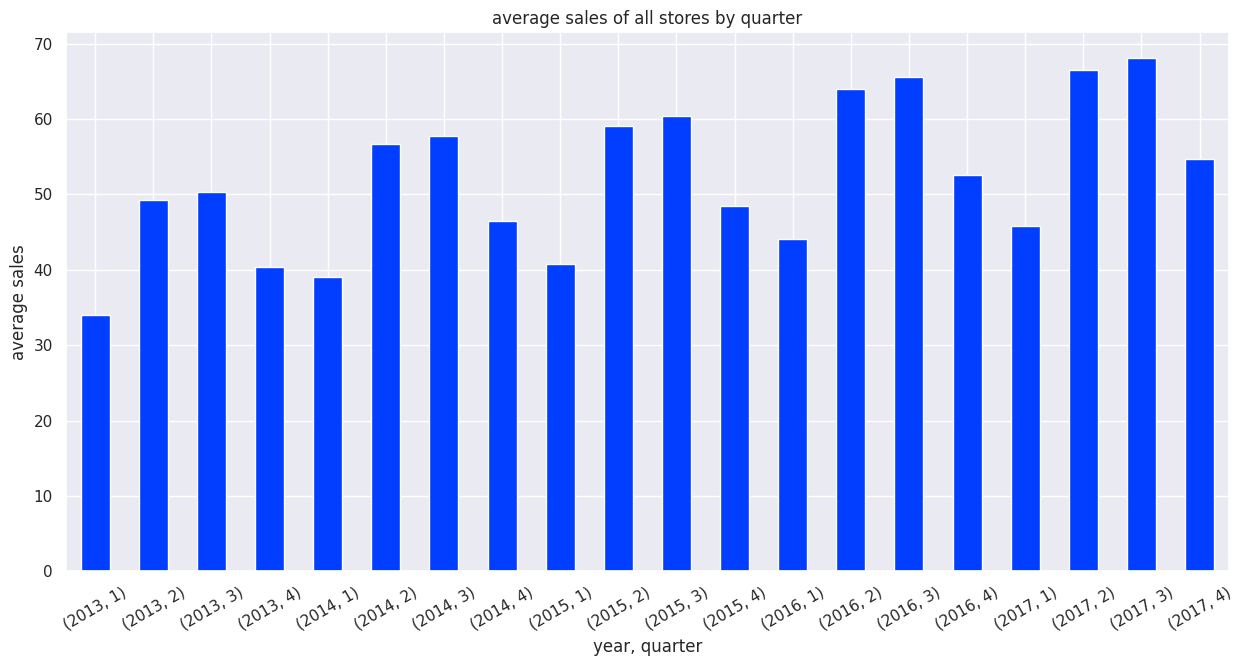

In [ ]:
#average sales by stores across quarters
quarterly_sales = train.groupby(["year", "quarter"]).mean()['sales']

plt.figure(figsize=(15,7))

quarterly_sales.plot(kind = "bar", label = "average sales")

plt.title("average sales of all stores by quarter")
plt.ylabel("average sales")
plt.xlabel("year, quarter")
plt.xticks(rotation = 30)

plt.show()

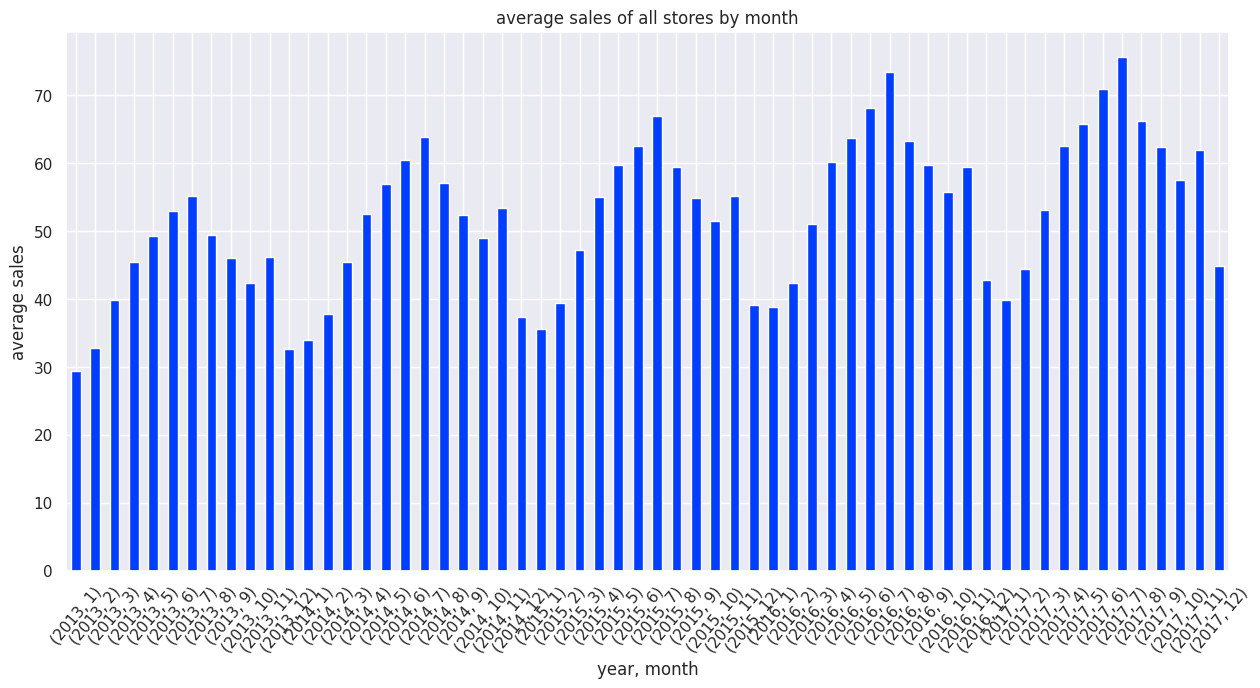

In [ ]:
#average sales by stores across quarters
monthly_sales = train.groupby(["year", "month"]).mean()['sales']
# monthly_sales.head()

# plotting graph

plt.figure(figsize=(15,7))

monthly_sales.plot(kind = "bar", label = "average sales")

plt.title("average sales of all stores by month")
plt.ylabel("average sales")
plt.xlabel("year, month")
plt.xticks(rotation = 50)

plt.show()

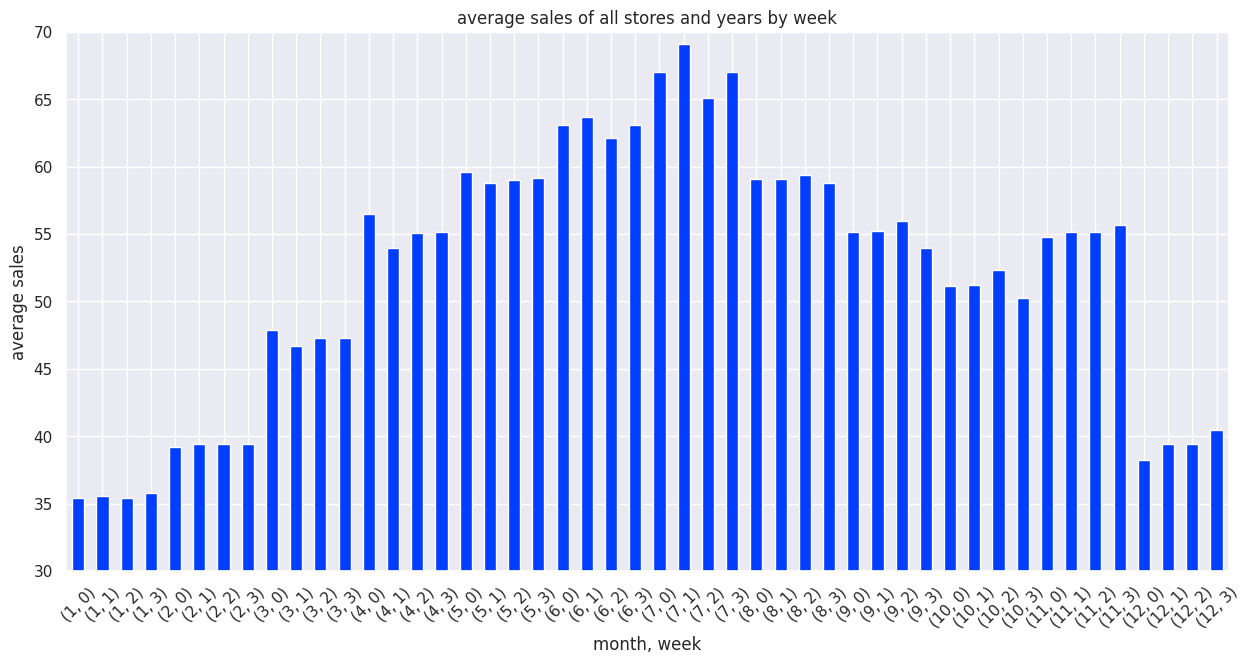

In [ ]:
#average sales by all stores across weeks
weekly_sales = train.groupby(["month", "week_of_month"]).mean()['sales']
# quarterly_sales.head()

# plotting graph

plt.figure(figsize=(15,7))

weekly_sales.plot(kind = "bar", label = "average sales")

plt.title("average sales of all stores and years by week")
plt.ylabel("average sales")
plt.xlabel("month, week")
plt.xticks(rotation = 45)
plt.ylim(30, 70)

plt.show()

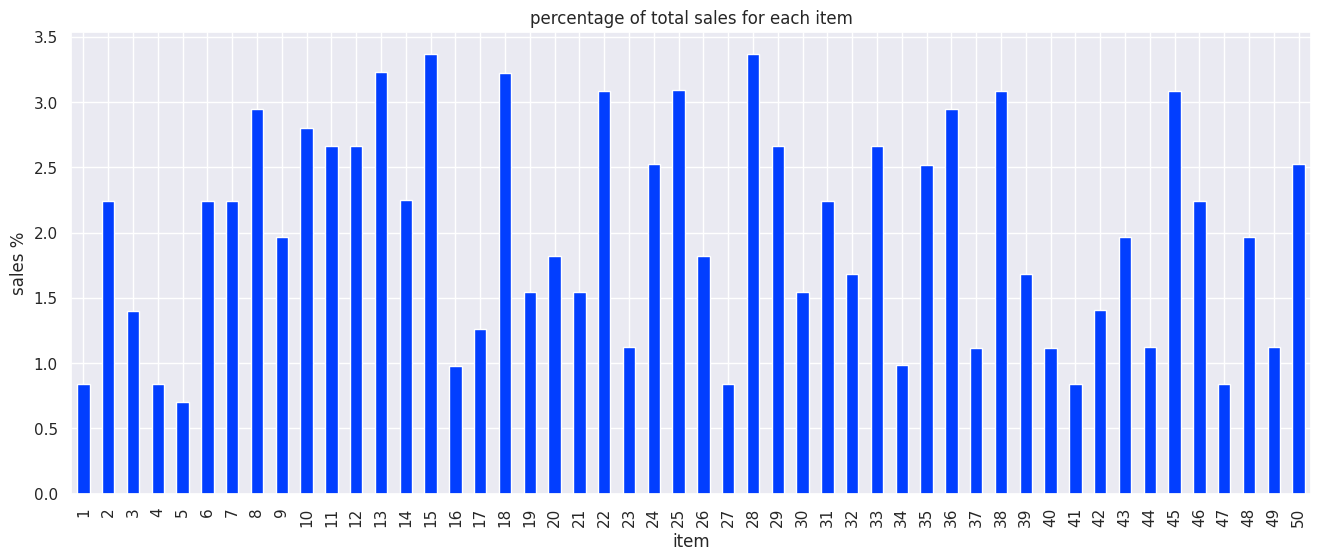

In [ ]:
# percentage of total sales for each item

item_sales = train.groupby('item')['sales'].sum()
sales_percentages = (item_sales / item_sales.sum()) * 100

sales_percentages.plot(kind='bar', figsize=(16,6))
plt.ylabel('sales %')
plt.title('percentage of total sales for each item')

plt.show()

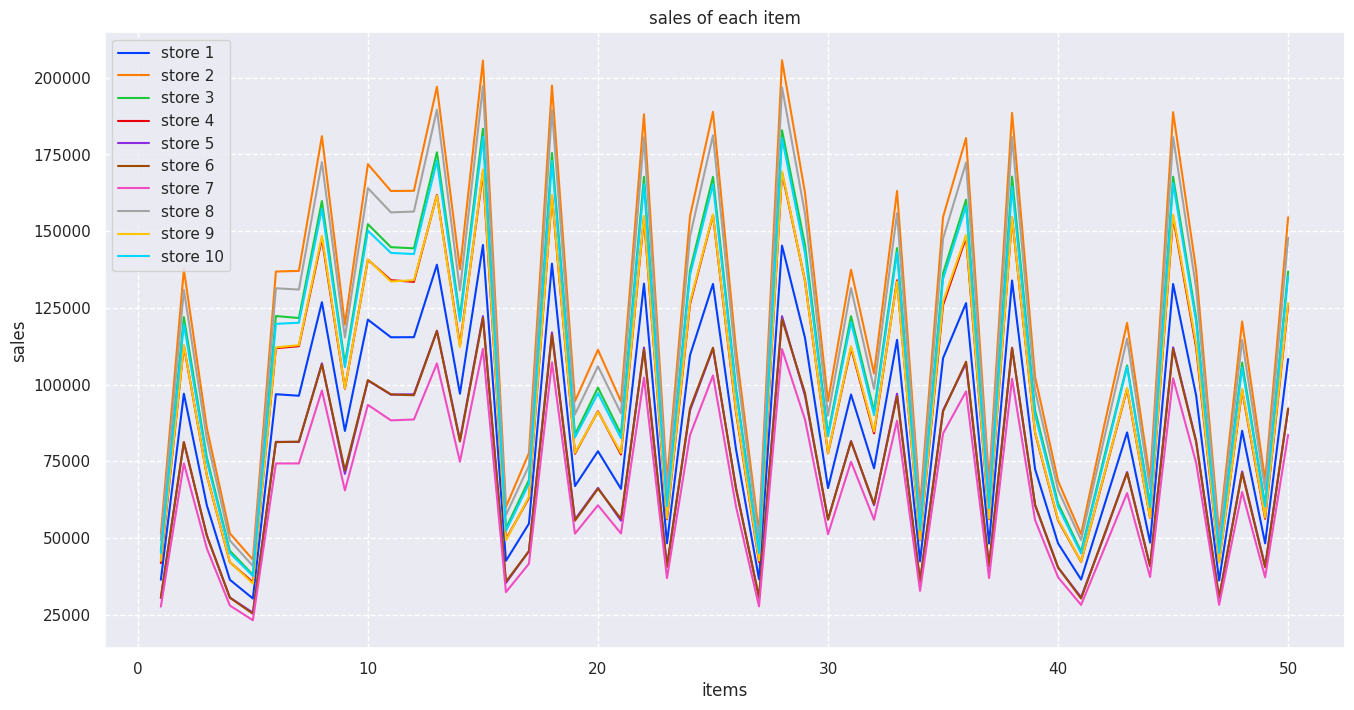

In [ ]:
# sales of each item
plt.figure(figsize=(16,8))
item_sales = train.groupby(['store','item'], as_index=False)['sales'].sum()

for i in range(1,11):
  plt.plot(item_sales[item_sales.store==i].item, item_sales[item_sales.store==i].sales, label=f'store {i}')

plt.xlabel('items')
plt.ylabel('sales')
plt.title("sales of each item")

plt.grid(ls="dashed")
plt.legend()
plt.show()

**XGBoost**

In [13]:
from sklearn.model_selection import train_test_split

x, y = train.drop("sales", axis="columns"), train["sales"]

x.dtypes

store            int64
item             int64
day              int64
month            int64
year             int64
day_of_week      int64
week_of_month    int64
week_of_year     int64
quarter          int64
dtype: object

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [ ]:
import xgboost as xgb

In [ ]:
dtrain_reg = xgb.DMatrix(x_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(x_test, y_test, enable_categorical=True)

In [ ]:
params = {"objective": "reg:squarederror"}

n = 1000

evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

model_xgb = xgb.train(
    params=params,
    dtrain=dtrain_reg,
    num_boost_round=n,
    evals=evals,
    verbose_eval=250,
    early_stopping_rounds=50,
)

[0]	train-rmse:26.38195	validation-rmse:26.36812
[250]	train-rmse:7.31121	validation-rmse:7.41155
[500]	train-rmse:7.17978	validation-rmse:7.36334
[693]	train-rmse:7.12296	validation-rmse:7.36248


In [ ]:
preds = model_xgb.predict(dtest_reg)
preds

array([63.805042, 19.33369 , 21.320606, ..., 46.62827 , 46.728477,
       70.77138 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
xgb_rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE of the model: {xgb_rmse}")

RMSE of the model: 7.362483838489754


In [ ]:
from sklearn.metrics import mean_absolute_error
xgb_mae = mean_absolute_error(y_test, preds)
print(f"MAE of the model: {xgb_mae}")

MAE of the model: 5.679616764752784


**ARIMA, SARIMA**

In [15]:
train_data = train_df.groupby('date', as_index=False).sales.mean()

In [40]:
x_train = train_data[train_data.date <= '2016-12-31']
x_test = train_data[train_data.date > '2016-12-31']

In [23]:
# Test for stationarity - argumented dickey fuller test
# H0: it is not stationary
# H1: it is stationary

from statsmodels.tsa.stattools import adfuller

In [24]:
def adfuller_test(sales):
  res = adfuller(sales)
  values = ['ADF test statistic', 'p-value', 'lags used', 'no.of observations used']
  for v,l in zip(res,values):
    print(l,":",str(v))
  if res[1]<=0.5:
    print("it is stationary")
  else:
    print("it is not stationary")

In [25]:
adfuller_test(x_train.sales)

ADF test statistic : -2.8366633376937997
p-value : 0.053224506481379934
lags used : 21
no.of observations used : 1439
it is stationary


In [54]:
x_train['first diff'] = x_train['sales'] - x_train['sales'].shift(1)
x_train.iloc[1:10]

<ipython-input-54-d1ec3b8e9496>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['first diff'] = x_train['sales'] - x_train['sales'].shift(1)


,date,sales,first diff
1,2013-01-02,27.356,-0.036
2,2013-01-03,28.976,1.620
3,2013-01-04,31.354,2.378
4,2013-01-05,32.474,1.120
5,2013-01-06,34.582,2.108
6,2013-01-07,23.538,-11.044
7,2013-01-08,27.120,3.582
8,2013-01-09,27.756,0.636
9,2013-01-10,29.284,1.528


In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

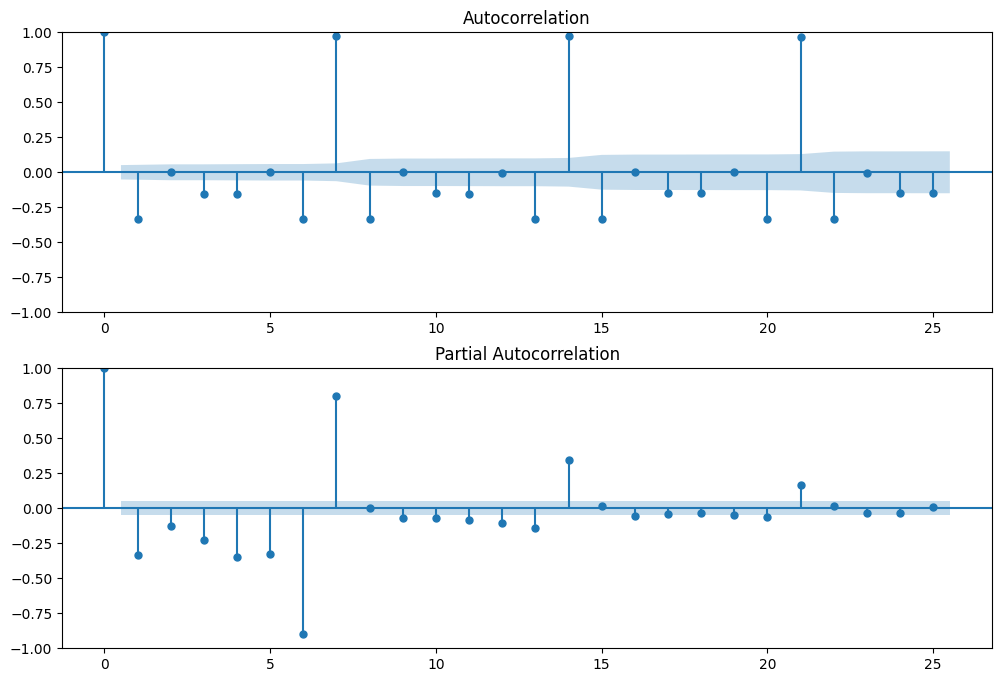

In [49]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = plot_acf(x_train['first diff'].iloc[1:], lags=25, ax=ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(x_train['first diff'].iloc[1:], lags=25, ax=ax2)

In [134]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

order = (1, 0, 1) #(p=AR, d=differencing, q=MA)

model_arima = sm.tsa.ARIMA(x_train.sales, order=order)
arima_results = model_arima.fit()

In [135]:
arima_predictions = arima_results.predict(start=len(x_train), end=len(x_train) + len(x_test) - 1, dynamic=False)

# Evaluate the ARIMA model
arima_rmse = np.sqrt(np.mean((arima_predictions - x_test.sales)**2))
print("ARIMA RMSE:", arima_rmse)

arima_mae = mean_absolute_error(x_test.sales, arima_predictions)
print(f"MAE of the model: {arima_mae}")

ARIMA RMSE: 18.77841145090559
MAE of the model: 15.433907596261868


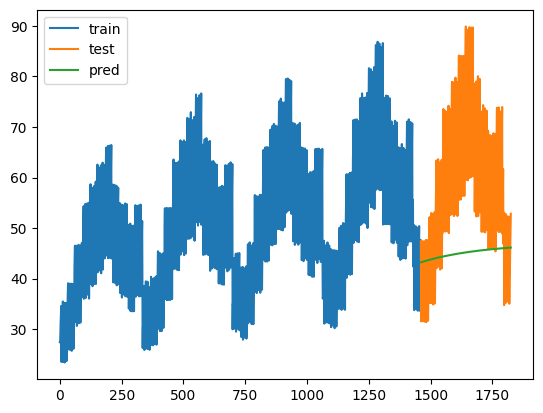

In [136]:
x_train.sales.plot(label='train')
x_test.sales.plot(label='test')
arima_predictions.plot(label='pred')

plt.legend()
plt.show()

In [127]:
import statsmodels.api as sm
# from statsmodels.tsa.SARIMAX.model import SARIMAX
order = (2, 1, 1)

model_sarima = sm.tsa.SARIMAX(x_train.sales, order=order, seasonal_order=(2, 1, 1, 12))
sarima_results = model_sarima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [128]:
sarima_predictions = sarima_results.predict(start=len(x_train), end=len(x_train) + len(x_test) - 1, dynamic=False)

# Evaluate the ARIMA model
sarima_rmse = np.sqrt(np.mean((sarima_predictions - x_test.sales)**2))
print("SARIMAX RMSE:", sarima_rmse)


sarima_mae = mean_absolute_error(x_test.sales, arima_predictions)
print(f"MAE of the model: {sarima_mae}")

SARIMAX RMSE: 19.326660691764477
MAE of the model: 15.433907596261868


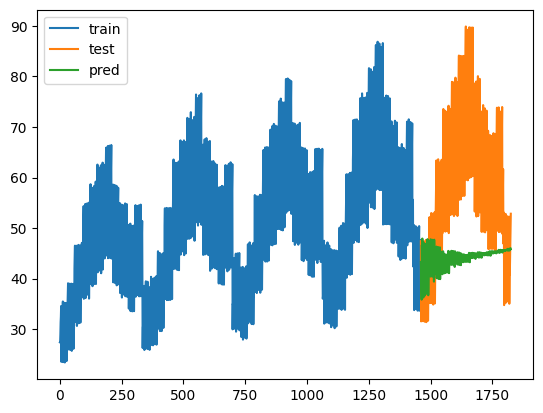

In [130]:
x_train.sales.plot(label='train')
x_test.sales.plot(label='test')
sarima_predictions.plot(label='pred')

plt.legend()
plt.show()

**using LSTM, CNN and LSTM**

In [ ]:
lag_size = (test_df['date'].max().date() - train_df['date'].max().date()).days
print('Min date from test set: %s' % test_df['date'].min().date())
print('Max date from test set: %s' % test_df['date'].max().date())
print('Forecast lag size', lag_size)

Min date from test set: 2018-01-01
Max date from test set: 2018-03-31
Forecast lag size 90


In [ ]:
train = train_df[(train_df['date'] >= '2017-01-01')]

In [ ]:
def series_to_supervised(data, window=1, lag=1, dropnan=True):
    cols, names = list(), list()

    #Input sequence (t-n, ... t-1)
    for i in range(window, 0, -1):
        cols.append(data.shift(i))
        names += [('%s(t-%d)' % (col, i)) for col in data.columns]

    # Current timestep (t=0)
    cols.append(data)
    names += [('%s(t)' % (col)) for col in data.columns]

    # Target timestep (t=lag)
    cols.append(data.shift(-lag))
    names += [('%s(t+%d)' % (col, lag)) for col in data.columns]

    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

train_gp = train.sort_values('date').groupby(['item', 'store', 'date'],
                                            as_index=False)
train_gp = train_gp.agg({'sales':['mean']})
train_gp.columns = ['item', 'store', 'date', 'sales']

window = 29
lag = lag_size
series = series_to_supervised(train_gp.drop('date', axis=1), window=window, lag=lag)

last_item = 'item(t-%d)' % window
last_store = 'store(t-%d)' % window
series = series[(series['store(t)'] == series[last_store])]
series = series[(series['item(t)'] == series[last_item])]

columns_to_drop = [('%s(t+%d)' % (col, lag)) for col in ['item', 'store']]
for i in range(window, 0, -1):
    columns_to_drop += [('%s(t-%d)' % (col, i)) for col in ['item', 'store']]
series.drop(columns_to_drop, axis=1, inplace=True)
series.drop(['item(t)', 'store(t)'], axis=1, inplace=True)

In [ ]:
pd.set_option('display.max_columns', 15)
series

,sales(t-29),sales(t-28),sales(t-27),sales(t-26),sales(t-25),sales(t-24),sales(t-23),...,sales(t-5),sales(t-4),sales(t-3),sales(t-2),sales(t-1),sales(t),sales(t+90)
29,19.0,15.0,10.0,16.0,14.0,24.0,14.0,...,14.0,13.0,10.0,16.0,24.0,9.0,33.0
30,15.0,10.0,16.0,14.0,24.0,14.0,20.0,...,13.0,10.0,16.0,24.0,9.0,17.0,15.0
31,10.0,16.0,14.0,24.0,14.0,20.0,18.0,...,10.0,16.0,24.0,9.0,17.0,15.0,21.0
32,16.0,14.0,24.0,14.0,20.0,18.0,11.0,...,16.0,24.0,9.0,17.0,15.0,17.0,29.0
33,14.0,24.0,14.0,20.0,18.0,11.0,14.0,...,24.0,9.0,17.0,15.0,17.0,24.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182405,79.0,89.0,96.0,92.0,102.0,60.0,81.0,...,97.0,99.0,63.0,79.0,80.0,82.0,63.0
182406,89.0,96.0,92.0,102.0,60.0,81.0,79.0,...,99.0,63.0,79.0,80.0,82.0,90.0,59.0
182407,96.0,92.0,102.0,60.0,81.0,79.0,78.0,...,63.0,79.0,80.0,82.0,90.0,103.0,74.0
182408,92.0,102.0,60.0,81.0,79.0,78.0,97.0,...,79.0,80.0,82.0,90.0,103.0,99.0,62.0


In [ ]:
# Train/Validation Split

# label
labels_col = 'sales(t+%d)' % lag_size  # sales(t+90)
labels = series[labels_col]
series = series.drop(labels_col, axis=1)

X_train, X_valid, Y_train, Y_valid = train_test_split(series,
                                                     labels.values,
                                                     test_size=0.4,
                                                     random_state=0)

print('Train set shape', X_train.shape)
print('Validation set shape', X_valid.shape)

Train set shape (100746, 30)
Validation set shape (67164, 30)


In [ ]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_valid.values.reshape((X_valid.shape[0], X_valid.shape[1], 1))

In [ ]:
from sklearn import metrics

def scoring(y_true, y_pred):
    r2 = round(metrics.r2_score(y_true, y_pred) * 100, 3)
    #  mae = round(metrics.mean_absolute_error(y_true, y_pred), 3)
    corr = round(np.corrcoef(y_true, y_pred)[0, 1], 3)
    mape = round(
        metrics.mean_absolute_percentage_error(y_true, y_pred) * 100, 3
    )
    rmse = round(metrics.mean_squared_error(y_true, y_pred, squared=False), 3)

    df = pd.DataFrame({
        'R2': r2,
        'Corr': corr,
        'RMSE': rmse,
        'MAPE': mape
    }, index=[0])

    return df

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

def MinMax(y_true, y_pred, m="min"):
    if(m == "min"):
        return min(min(y_true), min(y_pred)) - 2
    else:
        return max(max(y_true), max(y_pred)) + 2

def myGraph(temp, title):
    fig, axs = plt.subplots(1, 2, figsize=(20, 5), gridspec_kw={'width_ratios': [2.5, 1]})
    axs[0].plot(temp.date, temp.y_true, label="Original")
    axs[0].plot(temp.date, temp.y_pred, label="Predicted")
    axs[0].legend(loc='upper right')
    axs[0].title.set_text(title)
    axs[0].set_xlabel("Date")
    axs[0].set_ylabel("Sales")

    axs[1].plot(temp.y_true, temp.y_pred, '.')

    plt.xlim(MinMax(temp.y_true, temp.y_pred), MinMax(temp.y_true, temp.y_pred, "max"))
    plt.ylim(MinMax(temp.y_true, temp.y_pred), MinMax(temp.y_true, temp.y_pred, "max"))

    abline(1, 0)
    plt.title(title)
    plt.xlabel("Original")
    plt.ylabel("Predicted")

**LSTM**

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mse', optimizer=tensorflow.keras.optimizers.legacy.Adam())

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
lstm_history = model_lstm.fit(X_train_series, Y_train,
                              validation_data=(X_valid_series, Y_valid),
                              epochs=30,
                              verbose=2)

Epoch 1/30
3149/3149 - 59s - loss: 9376.7773 - val_loss: 402.9839 - 59s/epoch - 19ms/step
Epoch 2/30
3149/3149 - 56s - loss: 671.2394 - val_loss: 450.5421 - 56s/epoch - 18ms/step
Epoch 3/30
3149/3149 - 57s - loss: 436.1791 - val_loss: 416.9756 - 57s/epoch - 18ms/step
Epoch 4/30
3149/3149 - 57s - loss: 421.2972 - val_loss: 433.5831 - 57s/epoch - 18ms/step
Epoch 5/30
3149/3149 - 66s - loss: 415.5069 - val_loss: 401.0205 - 66s/epoch - 21ms/step
Epoch 6/30
3149/3149 - 57s - loss: 567144448.0000 - val_loss: 10376746.0000 - 57s/epoch - 18ms/step
Epoch 7/30
3149/3149 - 56s - loss: 239743.9062 - val_loss: 89511.6953 - 56s/epoch - 18ms/step
Epoch 8/30
3149/3149 - 56s - loss: 21369.0664 - val_loss: 1189.9424 - 56s/epoch - 18ms/step
Epoch 9/30
3149/3149 - 55s - loss: 981.5969 - val_loss: 697.2300 - 55s/epoch - 17ms/step
Epoch 10/30
3149/3149 - 55s - loss: 7173.7471 - val_loss: 1004.1019 - 55s/epoch - 17ms/step
Epoch 11/30
3149/3149 - 55s - loss: 2622.4827 - val_loss: 44716.2344 - 55s/epoch - 18ms

In [ ]:
lstm_train_pred = model_lstm.predict(X_train_series)
lstm_valid_pred = model_lstm.predict(X_valid_series)

Y_train_ = pd.DataFrame({
    'y_true': Y_train,
    'y_pred': lstm_train_pred.reshape(lstm_train_pred.shape[0],)
}).set_index(X_train.index).sort_index()
Y_train_ = pd.merge(Y_train_, train_gp,
                   left_index=True, right_index=True,
                   how='left')

Y_valid_ = pd.DataFrame({
    'y_true': Y_valid,
    'y_pred': lstm_valid_pred.reshape(lstm_valid_pred.shape[0],)
}).set_index(X_valid.index).sort_index()
Y_valid_ = pd.merge(Y_valid_, train_gp,
                 left_index=True, right_index=True,
                 how='left')


2099/2099 [==============================] - 14s 7ms/step


In [ ]:
#train
# print(y_train)
lstm_train_score = scoring(Y_train_.y_true, Y_train_.y_pred)
lstm_train_score

,R2,Corr,RMSE,MAPE
0,57.833,0.764,20.536,32.641


In [ ]:
# Valid
lstm_valid_score = scoring(Y_valid_.y_true, Y_valid_.y_pred)
lstm_valid_score

,R2,Corr,RMSE,MAPE
0,57.499,0.762,20.552,32.576


In [ ]:
temp = Y_valid_.loc[(Y_valid_.store == 2) & (Y_valid_.item == 11),].sort_values('date')
print("Obs of Test set: ", temp.shape[0])

scoring(temp.y_true, temp.y_pred)

Obs of Test set:  143


,R2,Corr,RMSE,MAPE
0,-28.941,0.149,28.771,24.621


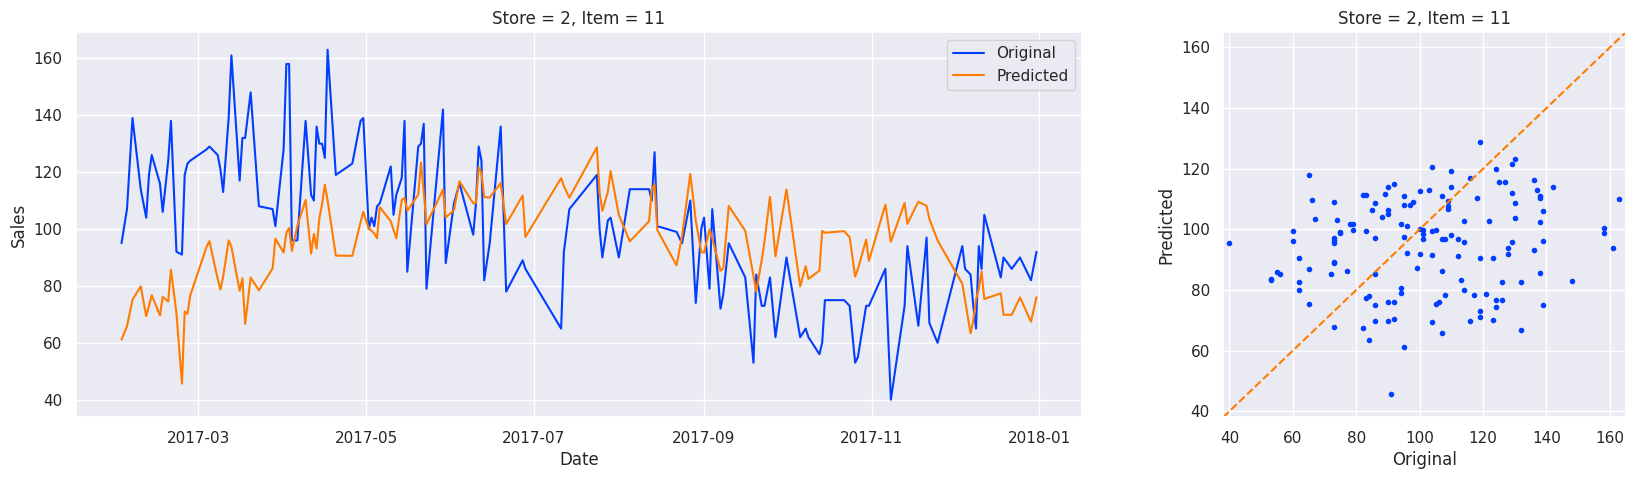

In [ ]:
myGraph(temp, 'Store = %d, Item = %d' % (2, 11))


**CNN+LSTM**

In [ ]:
subsequences = 2
timesteps = X_train_series.shape[1] // subsequences
X_train_series_sub = X_train_series.reshape((X_train_series.shape[0], subsequences, timesteps, 1))
X_valid_series_sub = X_valid_series.reshape((X_valid_series.shape[0], subsequences, timesteps, 1))

print('Train set shape', X_train_series_sub.shape)
print('Validation set shape', X_valid_series_sub.shape)

Train set shape (100746, 2, 15, 1)
Validation set shape (67164, 2, 15, 1)


In [ ]:
model_cnn_lstm = Sequential()
model_cnn_lstm.add(TimeDistributed(
    Conv1D(filters=64, kernel_size=1,activation='relu'),
    input_shape=(None, X_train_series_sub.shape[2], X_train_series_sub.shape[3])
))
model_cnn_lstm.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model_cnn_lstm.add(TimeDistributed(Flatten()))
model_cnn_lstm.add(LSTM(50, activation='relu'))
model_cnn_lstm.add(Dense(1))
model_cnn_lstm.compile(loss='mse', optimizer=tensorflow.keras.optimizers.legacy.Adam())

In [ ]:
cnn_lstm_history = model_cnn_lstm.fit(X_train_series_sub, Y_train,
                                     validation_data=(X_valid_series_sub, Y_valid),
                                     epochs=30, verbose=2)


Epoch 1/30
3149/3149 - 29s - loss: 432.6342 - val_loss: 403.7938 - 29s/epoch - 9ms/step
Epoch 2/30
3149/3149 - 26s - loss: 402.6629 - val_loss: 390.0473 - 26s/epoch - 8ms/step
Epoch 3/30
3149/3149 - 26s - loss: 391.1889 - val_loss: 386.2432 - 26s/epoch - 8ms/step
Epoch 4/30
3149/3149 - 26s - loss: 390.9624 - val_loss: 407.0627 - 26s/epoch - 8ms/step
Epoch 5/30
3149/3149 - 24s - loss: 387.6109 - val_loss: 385.1161 - 24s/epoch - 8ms/step
Epoch 6/30
3149/3149 - 26s - loss: 382.3218 - val_loss: 376.7379 - 26s/epoch - 8ms/step
Epoch 7/30
3149/3149 - 25s - loss: 378.1159 - val_loss: 384.4202 - 25s/epoch - 8ms/step
Epoch 8/30
3149/3149 - 25s - loss: 375.3388 - val_loss: 367.1516 - 25s/epoch - 8ms/step
Epoch 9/30
3149/3149 - 24s - loss: 372.6074 - val_loss: 367.9171 - 24s/epoch - 8ms/step
Epoch 10/30
3149/3149 - 26s - loss: 369.3565 - val_loss: 364.5276 - 26s/epoch - 8ms/step
Epoch 11/30
3149/3149 - 25s - loss: 367.0185 - val_loss: 358.8871 - 25s/epoch - 8ms/step
Epoch 12/30
3149/3149 - 29s - 

In [ ]:
cnn_lstm_train_pred = model_cnn_lstm.predict(X_train_series_sub)
cnn_lstm_valid_pred = model_cnn_lstm.predict(X_valid_series_sub)

Y_train_ = pd.DataFrame({
    'y_true': Y_train,
    'y_pred': cnn_lstm_train_pred.reshape(cnn_lstm_train_pred.shape[0],)
}).set_index(X_train.index).sort_index()
Y_train_ = pd.merge(Y_train_, train_gp,
                   left_index=True, right_index=True,
                   how='left')

Y_valid_ = pd.DataFrame({
    'y_true': Y_valid,
    'y_pred': cnn_lstm_valid_pred.reshape(cnn_lstm_valid_pred.shape[0],)
}).set_index(X_valid.index).sort_index()
Y_valid_ = pd.merge(Y_valid_, train_gp,
                   left_index=True, right_index=True,
                   how='left')

2099/2099 [==============================] - 5s 3ms/step


In [ ]:
#Train
cnn_lstm_train_score = scoring(Y_train_.y_true, Y_train_.y_pred)
cnn_lstm_train_score

,R2,Corr,RMSE,MAPE
0,64.341,0.806,18.885,32.377


In [ ]:
#Validation
cnn_lstm_valid_score = scoring(Y_valid_.y_true, Y_valid_.y_pred)
cnn_lstm_valid_score

,R2,Corr,RMSE,MAPE
0,63.99,0.804,18.917,32.369


In [ ]:
temp = Y_valid_.loc[(Y_valid_.store == 10) & (Y_valid_.item == 2),].sort_values('date')
print('Obs of Test Set: ', temp.shape[0])

scoring(temp.y_true, temp.y_pred)

Obs of Test Set:  136


,R2,Corr,RMSE,MAPE
0,14.354,0.552,25.677,56.47


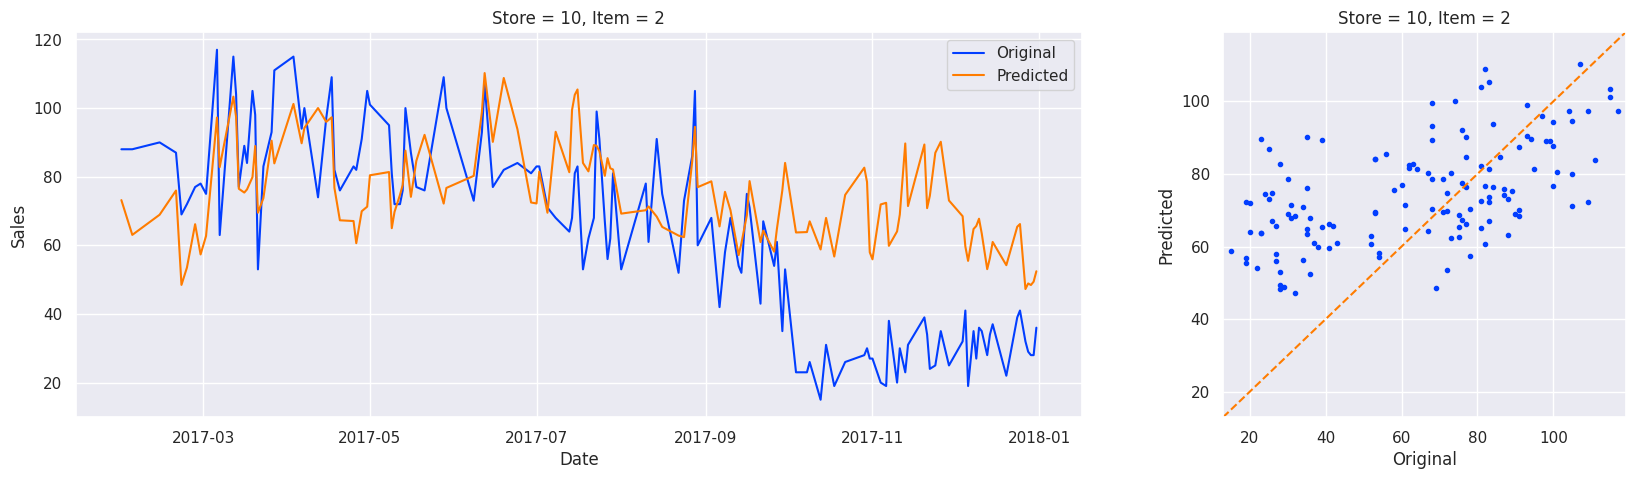

In [ ]:
myGraph(temp, 'Store = %d, Item = %d' % (10, 2))


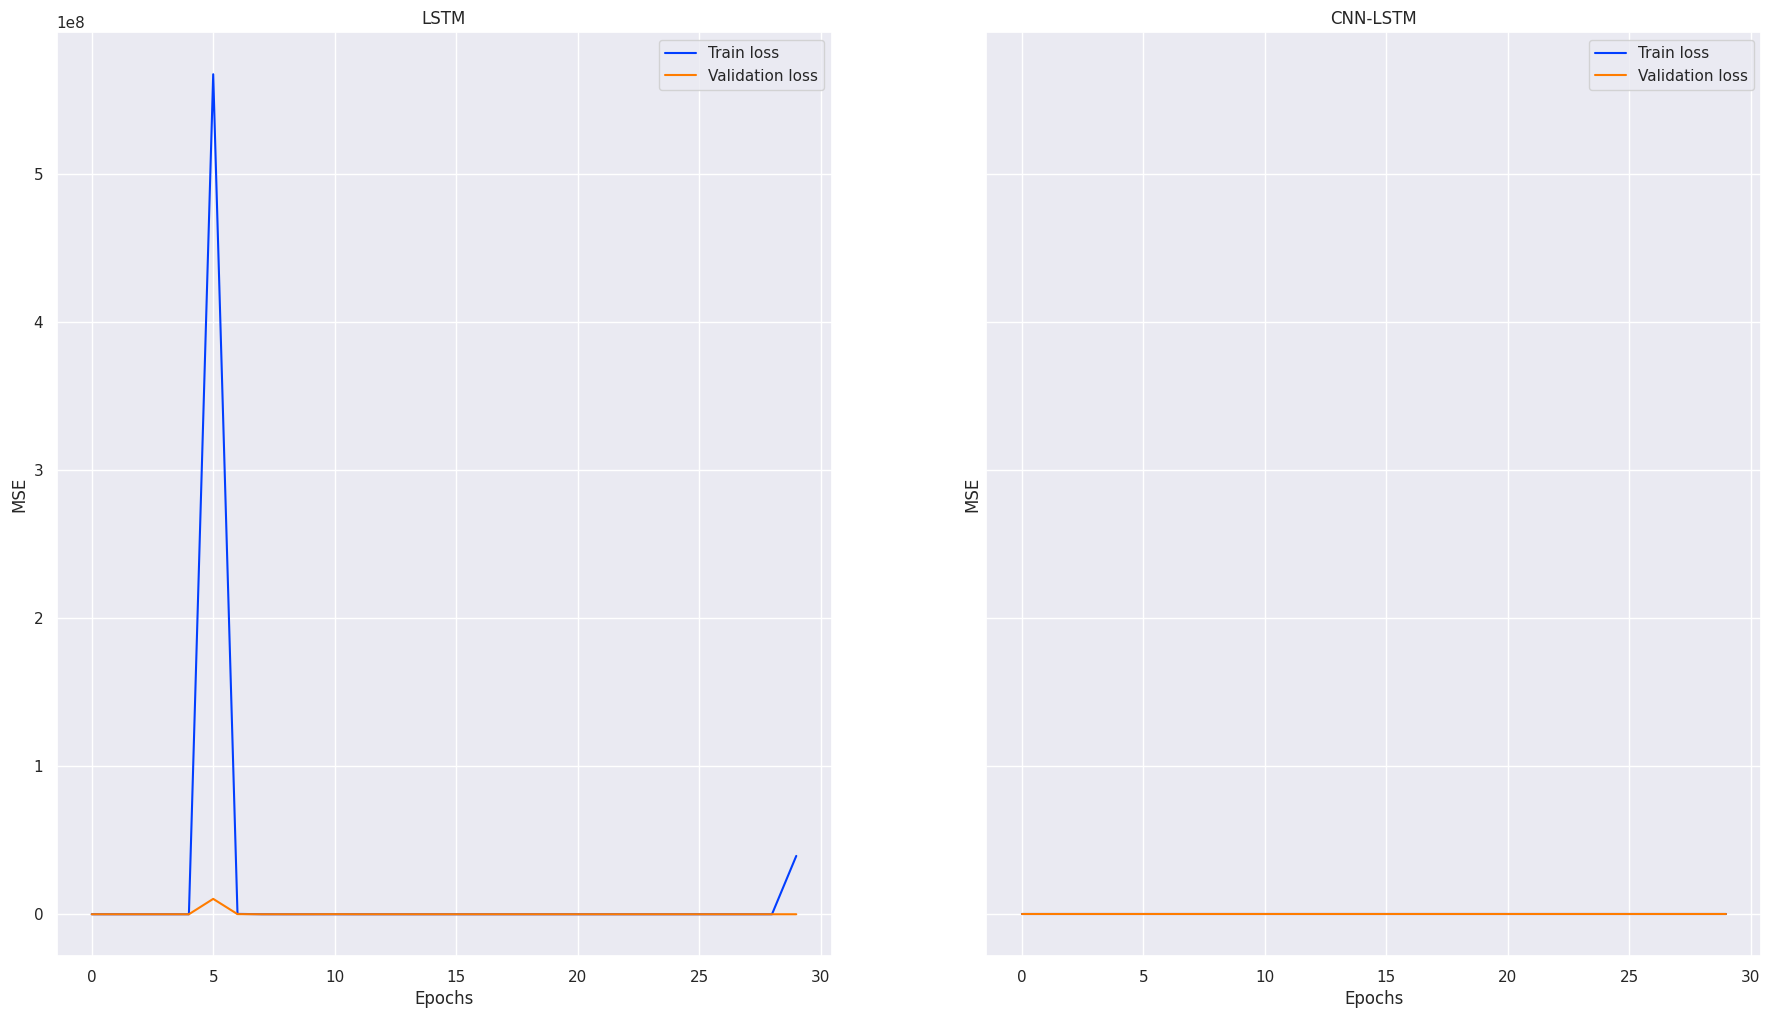

In [ ]:
fix, axes = plt.subplots(
    1, 2, sharex=True, sharey=True, figsize=(22, 12))
ax1 = axes[0]
ax2 = axes[1]



ax1.plot(lstm_history.history['loss'], label='Train loss')
ax1.plot(lstm_history.history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('LSTM')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MSE')

ax2.plot(cnn_lstm_history.history['loss'], label='Train loss')
ax2.plot(cnn_lstm_history.history['val_loss'], label='Validation loss')
ax2.legend(loc='best')
ax2.set_title('CNN-LSTM')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MSE')

plt.show()

In [ ]:
models = { 'XGB': {'RMSE':xgb_rmse, 'MAE':xgb_mae, 'model': model_xgb},
     'ARIMA': {'RMSE':arima_rmse, 'MAE':arima_mae, 'model': arima_results},
     'SARIMA': {'RMSE':sarima_rmse, 'MAE':sarima_mae, 'model':sarima_results},
     'LSTM': {'RMSE':float(lstm_valid_score['RMSE']), 'MAE':float(lstm_valid_score.MAPE), 'model':model_lstm},
     'CNN_LSTM': {'RMSE':float(cnn_lstm_valid_score.RMSE), 'MAE':float(cnn_lstm_valid_score.MAPE), 'model':model_cnn_lstm}}

models = pd.DataFrame(models)
models = models.T
models.sort_values(by= 'RMSE')

,RMSE,MAE,model
XGB,7.362484,5.679617,<xgboost.core.Booster object at 0x7a0fdf407010>
CNN_LSTM,18.917,32.369,<keras.src.engine.sequential.Sequential object...
LSTM,20.552,32.576,<keras.src.engine.sequential.Sequential object...
ARIMA,26.269871,23.147585,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...
SARIMA,26.269871,23.147585,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...


In [ ]:
import joblib
xgb_model = models.XGB.model

# Save the model to a file
joblib.dump(xgb_model, 'xgb_model.joblib')

['xgb_model.joblib']